In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

C:\AI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\AI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\AI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\AI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym

In [2]:
df = pd.read_csv('flight_delay.csv')

In [3]:
df.head(10)

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0
5,HAM,2015-10-27 14:30:00,SVO,2015-10-27 17:15:00,0.0
6,SVO,2015-10-27 14:35:00,JFK,2015-10-28 01:25:00,0.0
7,DXB,2015-10-27 15:40:00,SVO,2015-10-27 21:20:00,1.0
8,SVO,2015-10-27 16:10:00,VVO,2015-10-28 00:35:00,0.0
9,TLV,2015-10-27 16:45:00,SVO,2015-10-27 20:55:00,0.0


In [4]:
types = df.dtypes
types

Depature Airport            object
Scheduled depature time     object
Destination Airport         object
Scheduled arrival time      object
Delay                      float64
dtype: object

In [5]:
df['Scheduled depature time'] = pd.to_datetime(df['Scheduled depature time'])
df['Scheduled arrival time'] = pd.to_datetime(df['Scheduled arrival time'])

In [6]:
df['Scheduled depature time'] = pd.to_datetime(df['Scheduled depature time'], 
 format = '%Y-%m-%d%H:%M:%S', 
 errors = 'coerce')
df['Scheduled arrival time'] = pd.to_datetime(df['Scheduled arrival time'], 
 format = '%Y-%m-%d%H:%M:%S', 
 errors = 'coerce')

In [7]:
de=df['Scheduled arrival time']-df['Scheduled depature time']
de=de.dt.total_seconds()/3600
df['flight duration']=de
df['Delay']=df['Delay']/60

In [8]:
df['Scheduled depature time_year'] = df['Scheduled depature time'].dt.year
df['Scheduled depature time_month'] = df['Scheduled depature time'].dt.month
df['Scheduled depature time_week'] = df['Scheduled depature time'].dt.week
df['Scheduled depature time_day'] = df['Scheduled depature time'].dt.day
df['Scheduled depature time_houre'] = df['Scheduled depature time'].dt.hour
df['Scheduled depature time_min'] = df['Scheduled depature time'].dt.minute
df['Scheduled depature time_dow'] = df['Scheduled depature time'].dt.dayofweek

In [9]:
df['Scheduled arrival time_year'] = df['Scheduled arrival time'].dt.year
df['Scheduled arrival time_month'] = df['Scheduled arrival time'].dt.month
df['Scheduled arrival time_week'] = df['Scheduled arrival time'].dt.week
df['Scheduled arrival time_day'] = df['Scheduled arrival time'].dt.day
df['Scheduled arrival time_houre'] = df['Scheduled arrival time'].dt.hour
df['Scheduled arrival time_min'] = df['Scheduled arrival time'].dt.minute
df['Scheduled arrival time_dow'] = df['Scheduled arrival time'].dt.dayofweek

In [10]:
df = df.drop(['Scheduled arrival time', 'Scheduled depature time'], axis=1)

In [11]:
df.head(10)

,Depature Airport,Destination Airport,Delay,flight duration,Scheduled depature time_year,Scheduled depature time_month,Scheduled depature time_week,Scheduled depature time_day,Scheduled depature time_houre,Scheduled depature time_min,Scheduled depature time_dow,Scheduled arrival time_year,Scheduled arrival time_month,Scheduled arrival time_week,Scheduled arrival time_day,Scheduled arrival time_houre,Scheduled arrival time_min,Scheduled arrival time_dow
0,SVO,HAV,0.000000,13.083333,2015,10,44,27,7,40,1,2015,10,44,27,20,45,1
1,SVO,JFK,0.033333,10.750000,2015,10,44,27,9,50,1,2015,10,44,27,20,35,1
2,SVO,MIA,0.000000,12.833333,2015,10,44,27,10,45,1,2015,10,44,27,23,35,1
3,SVO,LAX,0.000000,12.833333,2015,10,44,27,12,30,1,2015,10,44,28,1,20,2
4,OTP,SVO,0.150000,2.416667,2015,10,44,27,14,15,1,2015,10,44,27,16,40,1
5,HAM,SVO,0.000000,2.750000,2015,10,44,27,14,30,1,2015,10,44,27,17,15,1
6,SVO,JFK,0.000000,10.833333,2015,10,44,27,14,35,1,2015,10,44,28,1,25,2
7,DXB,SVO,0.016667,5.666667,2015,10,44,27,15,40,1,2015,10,44,27,21,20,1
8,SVO,VVO,0.000000,8.416667,2015,10,44,27,16,10,1,2015,10,44,28,0,35,2
9,TLV,SVO,0.000000,4.166667,2015,10,44,27,16,45,1,2015,10,44,27,20,55,1


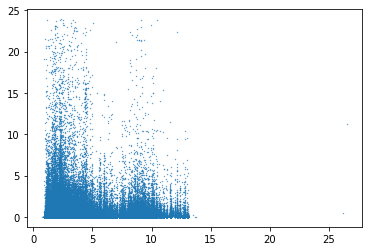

In [12]:
plt.scatter(df['flight duration'],df['Delay'],s=0.1)
plt.show()

In [13]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df)
df = pd.DataFrame(imputer.transform(df), columns=df.columns)

In [14]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
ft = ['Depature Airport', 'Destination Airport']
encoder.fit(df[ft])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [15]:
def Ordinal_e_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(new_feats, dtype=int)
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

In [16]:
df = Ordinal_e_new_features(df, ft, encoder)

In [17]:
df=df.rename(columns={0: 'Depature Airport', 1: 'Destination Airport'})

In [18]:
df.head(10)

,Delay,flight duration,Scheduled depature time_year,Scheduled depature time_month,Scheduled depature time_week,Scheduled depature time_day,Scheduled depature time_houre,Scheduled depature time_min,Scheduled depature time_dow,Scheduled arrival time_year,Scheduled arrival time_month,Scheduled arrival time_week,Scheduled arrival time_day,Scheduled arrival time_houre,Scheduled arrival time_min,Scheduled arrival time_dow,Depature Airport,Destination Airport
0,0,13.0833,2015,10,44,27,7,40,1,2015,10,44,27,20,45,1,144,56
1,0.0333333,10.75,2015,10,44,27,9,50,1,2015,10,44,27,20,35,1,144,68
2,0,12.8333,2015,10,44,27,10,45,1,2015,10,44,27,23,35,1,144,94
3,0,12.8333,2015,10,44,27,12,30,1,2015,10,44,28,1,20,2,144,82
4,0.15,2.41667,2015,10,44,27,14,15,1,2015,10,44,27,16,40,1,113,144
5,0,2.75,2015,10,44,27,14,30,1,2015,10,44,27,17,15,1,53,144
6,0,10.8333,2015,10,44,27,14,35,1,2015,10,44,28,1,25,2,144,68
7,0.0166667,5.66667,2015,10,44,27,15,40,1,2015,10,44,27,21,20,1,35,144
8,0,8.41667,2015,10,44,27,16,10,1,2015,10,44,28,0,35,2,144,171
9,0,4.16667,2015,10,44,27,16,45,1,2015,10,44,27,20,55,1,156,144


In [19]:
def removeOutliers(datafframe,feature):

    upper_limit = datafframe[feature].mean() + 3 * datafframe[feature].std()
    lower_limit = datafframe[feature].mean() - 3 * datafframe[feature].std()
    new_train_data = datafframe[(datafframe[feature] < upper_limit) & (datafframe[feature] > lower_limit)]

    return new_train_data

In [20]:
df=removeOutliers(df,'Delay')

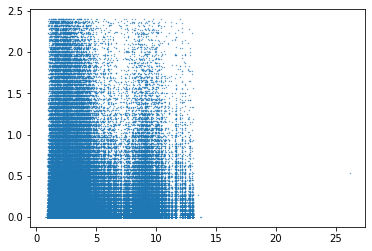

In [21]:
plt.scatter(df['flight duration'],df['Delay'],s=0.1)
plt.show()

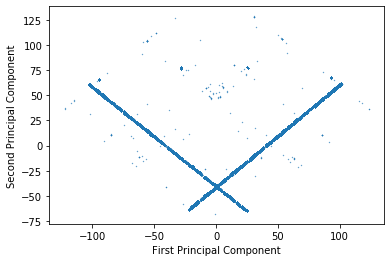

In [22]:
dim_reducer = PCA(n_components=2)
df_reduced = dim_reducer.fit_transform(df)
plt.scatter(df_reduced[:,0],df_reduced[:,1],s=0.1)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

KeyError: 0.016666666666666666

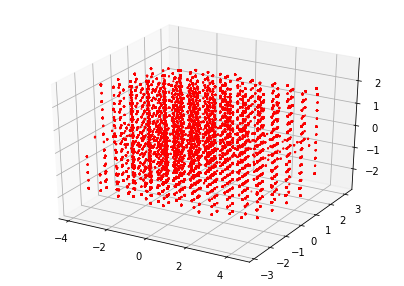

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

X = df.drop('Delay',axis=1)
y = df['Delay']
sc = StandardScaler()

scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)

pca = PCA(n_components=3)
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {0:'red',1:'green'}
labl = {0:'Malignant',1:'Benign'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    ix=np.where(y==l) 
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=1,label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

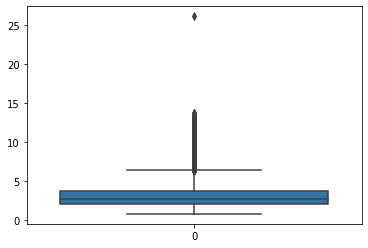

In [24]:
sns.boxplot(data=df['flight duration'])

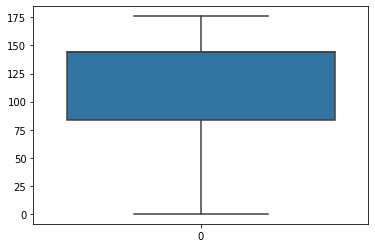

In [25]:
sns.boxplot(data=df['Destination Airport'])

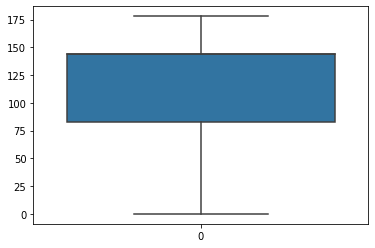

In [26]:
sns.boxplot(data=df['Depature Airport'])

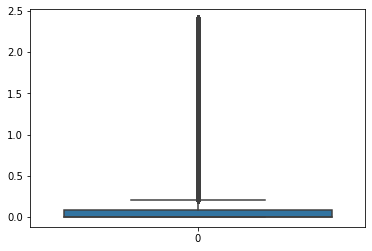

In [27]:
sns.boxplot(data=df['Delay'])

In [28]:
train = df.loc[df['Scheduled depature time_year'] < 2018] 
test = df.loc[df['Scheduled depature time_year'] == 2018]

In [29]:
train.head(10)

,Delay,flight duration,Scheduled depature time_year,Scheduled depature time_month,Scheduled depature time_week,Scheduled depature time_day,Scheduled depature time_houre,Scheduled depature time_min,Scheduled depature time_dow,Scheduled arrival time_year,Scheduled arrival time_month,Scheduled arrival time_week,Scheduled arrival time_day,Scheduled arrival time_houre,Scheduled arrival time_min,Scheduled arrival time_dow,Depature Airport,Destination Airport
0,0,13.0833,2015,10,44,27,7,40,1,2015,10,44,27,20,45,1,144,56
1,0.0333333,10.75,2015,10,44,27,9,50,1,2015,10,44,27,20,35,1,144,68
2,0,12.8333,2015,10,44,27,10,45,1,2015,10,44,27,23,35,1,144,94
3,0,12.8333,2015,10,44,27,12,30,1,2015,10,44,28,1,20,2,144,82
4,0.15,2.41667,2015,10,44,27,14,15,1,2015,10,44,27,16,40,1,113,144
5,0,2.75,2015,10,44,27,14,30,1,2015,10,44,27,17,15,1,53,144
6,0,10.8333,2015,10,44,27,14,35,1,2015,10,44,28,1,25,2,144,68
7,0.0166667,5.66667,2015,10,44,27,15,40,1,2015,10,44,27,21,20,1,35,144
8,0,8.41667,2015,10,44,27,16,10,1,2015,10,44,28,0,35,2,144,171
9,0,4.16667,2015,10,44,27,16,45,1,2015,10,44,27,20,55,1,156,144


In [30]:
y_test=test['Delay']
x_test=test[['flight duration']]
X_test=test.drop('Delay',axis=1)
y_train=train['Delay']
x_train=train[['flight duration']]
X_train=train.drop('Delay',axis=1)

In [31]:
scaler = RobustScaler()
scaler.fit_transform(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
x_train=x_train.reshape(-1, 1)
x_test=x_test.reshape(-1,1)

In [33]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)
train_x_poly

array([[ 1.        ,  5.9047619 , 34.86621315],
       [ 1.        ,  4.57142857, 20.89795918],
       [ 1.        ,  5.76190476, 33.19954649],
       ...,
       [ 1.        ,  0.61904762,  0.38321995],
       [ 1.        ,  4.9047619 , 24.05668934],
       [ 1.        ,  3.42857143, 11.75510204]])

In [34]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [0.         0.02384706 0.00042733]
Intercept:  0.11251149460466643


In [35]:
test_x_poly = poly.fit_transform(x_test)
test_y_ = clf.predict(test_x_poly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_y_))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_y_))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_y_)))
print('R2-score:', r2_score(y_test,test_y_ ) )

Mean Absolute Error: 0.14166808717897658
Mean Squared Error: 0.05081231014529742
Root Mean Squared Error: 0.22541586045639606
R2-score: -0.06912349562366171


Text(0, 0.5, 'Delay')

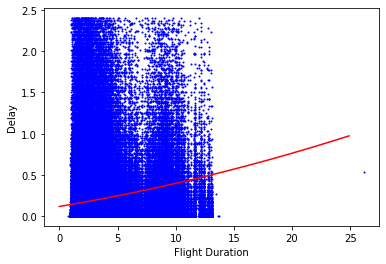

In [36]:
plt.scatter(df['flight duration'], df['Delay'],  color='blue',s=1)
XX = np.arange(0.0, 25.0, 0.1)
yy = clf.intercept_+ clf.coef_[1]*XX+ clf.coef_[2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Flight Duration")
plt.ylabel("Delay")

In [37]:
poly_all = PolynomialFeatures(degree=2)
train_x_poly_all = poly_all.fit_transform(X_train)
train_x_poly_all

array([[1.00000000e+00, 5.90476190e+00, 1.14985714e+03, ...,
        6.51479592e+03, 2.45602041e+03, 9.25897959e+02],
       [1.00000000e+00, 4.57142857e+00, 1.14985714e+03, ...,
        6.51479592e+03, 3.00948980e+03, 1.39022449e+03],
       [1.00000000e+00, 5.76190476e+00, 1.14985714e+03, ...,
        6.51479592e+03, 4.20867347e+03, 2.71887755e+03],
       ...,
       [1.00000000e+00, 6.19047619e-01, 1.15100000e+03, ...,
        6.51479592e+03, 2.87112245e+03, 1.26532653e+03],
       [1.00000000e+00, 4.90476190e+00, 1.15100000e+03, ...,
        8.91448980e+02, 2.40989796e+03, 6.51479592e+03],
       [1.00000000e+00, 3.42857143e+00, 1.15100000e+03, ...,
        6.51479592e+03, 4.25479592e+03, 2.77879592e+03]])

In [38]:
clf_all = linear_model.LinearRegression()
train_y_all = clf_all.fit(train_x_poly_all, y_train)
# The coefficients
print ('Coefficients: ', clf_all.coef_)
print ('Intercept: ',clf_all.intercept_)

Coefficients:  [-8.85503082e-04 -1.11363981e-01 -3.70367520e+02  5.44808976e+02
  1.32974779e+00  9.49932931e+00  1.05165966e+00 -1.98026745e-01
  4.41278829e-01 -3.70347419e+02 -5.59559910e+02  1.31026924e+00
 -9.85327046e+00 -2.31518388e+00 -1.32496825e-01  2.56195278e-01
  4.58549173e-01  2.92292884e-01  1.62831959e+00 -3.03183032e+00
  2.23463700e+03 -1.12626871e-01  3.89964932e+01  3.25728264e+00
  5.40951413e-02  3.68785977e-01  3.00014093e+00 -2.23410856e+03
  1.76872530e-02 -3.93122867e+01 -3.25901273e+00 -5.42629176e-02
 -3.78211271e-01 -2.52411615e-04  1.94938366e-04  6.43427718e+01
 -1.27648031e+01 -7.82187326e+01 -2.45683624e+00  4.51438502e+00
 -4.16424989e-01  1.53274455e+02 -2.98929108e+02  1.24086162e+01
 -7.95376686e+01  1.34626784e+00  1.81017156e+00 -3.74422627e-02
  1.53223722e+02 -7.68105640e-02  1.01278763e-01  1.04770728e+02
 -7.38643949e+01 -8.52528562e+02  2.23527021e+03  3.72132315e+01
 -2.36975998e+00 -1.21672806e+01  2.07204540e+02 -2.02783940e+01
 -5.589688

In [39]:
test_x_poly_all = poly.fit_transform(X_test)
test_y_all = clf_all.predict(test_x_poly_all)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_y_all))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_y_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_y_all)))
print('R2-score:', r2_score(y_test,test_y_all ) )

Mean Absolute Error: 0.3333860458141653
Mean Squared Error: 0.12938015568912242
Root Mean Squared Error: 0.35969453108036326
R2-score: -1.7222412033452823


In [40]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficient : {regressor.coef_}")

y_pred = regressor.predict(x_test)

Model intercept : 0.11274162165590035
Model coefficient : [0.02514729]


In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2-score:', r2_score(y_test,y_pred ) )

Mean Absolute Error: 0.14167798973593432
Mean Squared Error: 0.05082066508737267
Root Mean Squared Error: 0.2254343919799565
R2-score: -0.06929928894720261


Text(0, 0.5, 'Delay')

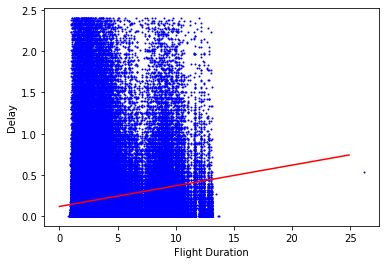

In [42]:
plt.scatter(df['flight duration'], df['Delay'],  color='blue',s=1)
XX = np.arange(0.0, 25.0, 0.1)
yy = regressor.intercept_+ regressor.coef_[0]*XX
plt.plot(XX, yy, '-r' )
plt.xlabel("Flight Duration")
plt.ylabel("Delay")

In [43]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")

y_pred = regressor.predict(X_test)

Model intercept : -22.315152288501377
Model coefficients : [ 2.71773424e-02  3.37794183e+00  2.55545551e-01  3.21702687e-04
  9.38929410e-03  4.07950887e-03  3.19883700e-04 -2.88195890e-03
 -3.35849216e+00 -2.55266029e-01  8.10958344e-05 -1.04776949e-02
  1.21289292e-03  9.79822571e-05  4.43448446e-03 -1.59305418e-04
  3.89154073e-04]


In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2-score:', r2_score(y_test,y_pred ) )

Mean Absolute Error: 0.15314027079735051
Mean Squared Error: 0.05298737290533192
Root Mean Squared Error: 0.23018986273363976
R2-score: -0.1148882068631123


0.05124456433109531
0.05124456433109531
0.05124456433109531
0.05124456433109531
0.05124456433109531
0.05124456433109531
0.05124456433109531
0.05124456433109531
0.05115800566943597


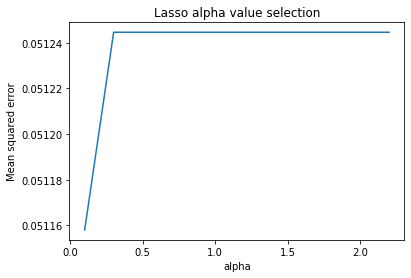

Best value of alpha: 0.1


In [45]:
alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    # Write (5 lines): create a Lasso regressor with the alpha value.
    # Fit it to the training set, then get the prediction of the validation set (x_val).
    # calculate the mean sqaured error loss, then append it to the losses array
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(mse)
    losses.append(mse)
plt.plot(alphas, losses)
plt.title("Lasso alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)

0.050820663865724196
0.050820663976782116
0.05082066425442782
0.05082066436548645
0.05082066442101585
0.0508206644765453
0.05082066453207478
0.050820664920782764
0.05082066503184264


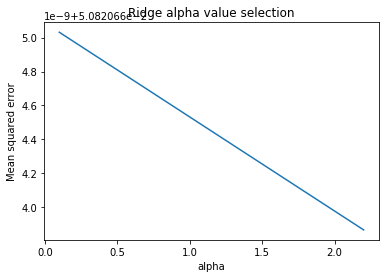

Best value of alpha: 2.2


In [46]:
alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    # Write (5 lines): create a Lasso regressor with the alpha value.
    # Fit it to the training set, then get the prediction of the validation set (x_val).
    # calculate the mean sqaured error loss, then append it to the losses array
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print(mse)
    losses.append(mse)
plt.plot(alphas, losses)
plt.title("Ridge alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)

In [47]:
model2 = Sequential()
model2.add(Dense(16, input_dim=17, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='relu'))
model2.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [48]:
model2.fit(X_train, y_train, epochs=1, batch_size=32)

492816/492816 [==============================] - 17s 34us/sample - loss: 0.1913 - acc: 0.5068


In [49]:
predicted = model2.predict(X_test, batch_size=128)

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R2-score:', r2_score(y_test,predicted ) )

Mean Absolute Error: 0.05934423910890542
Mean Squared Error: 0.05104872964437385
Root Mean Squared Error: 0.22593965929949936
R2-score: -0.07409791305446567
